---
title: "算法交易：制胜策略与原理(欧内斯特·陈)之一"
author: 王一刀
categories: [量化交易]
date: 2024-07-27
format: html
---

> 在均值回归交易策略所相关的系列当中，**我们将讨论以多元的统计技术［如扩展版的迪基-富勒检验（Dickey-Fuller检验，即ADF检验）、赫斯特（Hurst）指数、方差比检验、半衰期检验模式等］来检测时间序列的均值回归之属性，以及相关的平稳性**；同时，我们还要**检测一个由金融工具所构建的投资组合之协整属性［相关检测模式包括协整型ADF检验（即CADF检验）、约翰森（Johansen）检验等］**。除了前述这些统计测试模式被机械地应用于时间序列而外，我们还要努力传达一个直观的理解方法，即要认知相关测试的真正用意以及简易数学方程背后的深层含义。  
我们将解析一些具有均值回归属性之投资组合所相关的最简单的技术和策略模式［如**线性交易模式、布林带线、卡尔曼过滤法则(Kalman filter)**等］。

>>前言

>如果我们不采取措施规避某些交易策略中的缺陷与圈套，而是毫无顾忌地应用此种交易策略，同时对其进行相应的回测，那么，这种回测将毫无意义，而且也可能出现更加糟糕的情况，因为在错误的背景之下所进行的回测会对你产生误导，从而诱发巨大的亏损。  
回测技术的主要特色是：对预期收益进行估算，同时，对相应交易策略的绩效进行统计学意义上的权衡。
>>第一章 回测及自动化的执行系统

这个可以用backtrader框架来实现

> 而我们之所以倾向于**在短期最大跌幅区间构建附着高夏普比率之模型**的原因是：此种方法能够以最大程度的自动化模式确保相关的模型通过交叉式的检测，而那些不能通过检测的模型所对应的数据子集大都是在下调区间之内缺少相应的样本。  
>结论：非线性模型比线性模型更加容易受到相应误差的干扰，因为非线性模型不仅仅是其构建过程过于烦琐，而且它所采集的随机参数也比线性模型多。  
如果我们企图以简单的金融工具历史价格的外推法来预期其未来的走势，一个非线性的模型可以更好地填充数据，但它不能做出较好的预期，但是，如果我们向非线性模型与线性模型同样填充大量的参数，相对于非线性模型，我们经常采用微积分的方法，**以泰勒连续展开公式求得近似的值**，这就意味着：相对于每一个非线性模型，总会有一个相应比较简单的、近似的、线性的解；而我们也不得不承认一个现实，即线性模型的本身是不被采用的（这里也存在一种例外，即在单一事件下弱化某些低阶项，但我们很少用此类事件描述理想金融市场的时间序列）。

## 泰勒连续展开公式
泰勒连续展开公式（Taylor Series Expansion）是数学中用于表示一个函数在某一点附近的一个无穷级数展开。这个公式是以英国数学家布鲁克·泰勒（Brook Taylor）的名字命名的。泰勒级数的基本思想是用一个函数在某一点附近的各阶导数值来代替该函数，从而得到一个关于变量的无穷级数表达式。

泰勒连续展开公式的定义如下：设函数f(x)在点x=a的某邻域内具有n阶导数，那么对于这个区间上任意x，有：

f(x) = f(a) + f'(a)(x-a) + f''(a)(x-a)^2/2! + ...+ f^n(a)(x-a)^n/n! + R_n(x)

其中，f'(a)表示函数f的一阶导数在点a处的值，f''(a)表示二阶导数在点a处的值，以此类推。R_n(x)是余项，它随着n的增大趋近于0。当n趋向于无穷大时，泰勒级数就变成了泰勒展开式。

泰勒级数有很多实际应用，例如用于数值计算、求解微分方程、信号处理等领域。

>瞬时出现的数据信息会在瞬时之间即刻消失。这是因为对于相应的做市商与电子通信网络的运营商而言，他们没有义务向所有的交易参与方通报相关的价格信息。坦白地说，很多做市商将相关的交易信息视若珍宝，同时将对这些信息的掌控视为自身的专利与特权（他们这种做法很聪明，因为，如货币这般的高频交易策略往往要依赖于订单信息与价格信息，这一点我们在第7章会有所涉及。像银行之类金融机构中的外汇自营交易部门，就擅长于将前述的相关信息据为己有）。


>如果我们发现一个比较理想的概率，在其情境之下，应用相关交易策略所获取的收益不输于或好于随机的收益以及实际收益的观测值，那么，这并不意味着所谓的动量交易策略能够捕捉任何行情或收益，其之所以盈利是因为我们比较幸运，即攫取的收益率的观测数值所生成的概率分布恰巧具有一个特定的均值和分布形态。为了在规定的时刻内生成模拟的随机收益率的相应数据，我们可以从MATLAB系统中的统计软件内选取那些服从皮尔逊分布的随机数来创建相应的函数；在模拟收益率marketRet_sim生成之后，我们根据其变化创建模拟的价格序列cl_sim；最后，我们根据相应价格的变化运行相关的交易策略，同时计算该策略项下的平均收益率。我们需要模拟10000次，然后统计有多少次因此策略而产生的平均收益大于等于实际的观测数据。

In [10]:
# Hypothesis Testing on a Futures Momentum Strategy

import numpy as np
import pandas as pd
#from scipy.stats import describe
from scipy.stats import pearson3

# moments表示阶矩，pearsrnd表示皮尔逊分布，skewness表示收益率曲线的偏度，kurtosis指峰度值，long代表多头（买方），short代表空头（卖方），backshift指二次变分，pos指持仓头寸。
df=pd.read_csv('datas/TU.csv')
df['Time']=pd.to_datetime(df['Time']).dt.date # remove HH:MM:SS
df.set_index('Time', inplace=True)

lookback=250
holddays=25

# 使用shift()方法将数据向下移动一行
longs= df['Close'] > df['Close'].shift()
shorts= df['Close'] < df['Close'].shift()

pos=np.zeros(df.shape[0])

for h in range(0, holddays):
    long_lag=longs.shift(h)
    long_lag[long_lag.isna()]=False
    long_lag=long_lag.astype(bool)

    short_lag=shorts.shift(h)
    short_lag[short_lag.isna()]=False
    short_lag=short_lag.astype(bool)

    pos[long_lag]=pos[long_lag]+1
    pos[short_lag]=pos[short_lag]-1
    
capital=np.nansum(np.array(pd.DataFrame(abs(pos)).shift()), axis=1)
pos[capital==0,]=0
capital[capital==0]=1
# pct_change()方法是pandas库中DataFrame和Series对象的一个常用方法，用于计算数据的变化百分比。
# 该方法计算相邻行之间的相对变化，并返回一个新的Series或DataFrame，其中包含每个元素相对于前一个元素的百分比变化。
# 计算收盘价的每日百分比变化，得到一个包含每日收益率的Series对象。
marketRet=df['Close'].pct_change()
# pd.DataFrame(pos).shift()：将持仓（pos）转换为DataFrame对象，并将其向上移动一行。这样做的目的是为了计算每个持仓在下一交易日的表现。
# np.array(pd.DataFrame(pos).shift()) * np.array(marketRet)：将移动后的持仓数据与每日收益率相乘，得到每个持仓在下一交易日的收益。
# np.nansum(..., axis=1)：沿着行方向对收益进行求和，得到每个交易日的总收益。
# ... / capital / holddays：将总收益除以初始资本（capital）和持仓天数（holddays），得到每日收益率。
ret=np.nansum(np.array(pd.DataFrame(pos).shift())*np.array(marketRet), axis=1)/capital/holddays
# 夏普比率（Sharpe Ratio） 
# np.sqrt(len(ret))：计算观测值的数量的平方根，即 (\sqrt{T})，其中 (T) 是观测值的数量。
# np.nanmean(ret)：计算收益率的平均值，忽略NaN值。
# np.nanstd(ret)：计算收益率的标准差，忽略NaN值。
# 将上述三个值相除，得到夏普比率
sharpe=np.sqrt(len(ret))*np.nanmean(ret)/np.nanstd(ret)

print("Gaussian Test statistic=%f" % sharpe)
#Gaussian Test statistic=2.769741

# Randomized market returns hypothesis test
# =============================================================================
#_,_,mean,var,skew,kurt=describe(marketRet, nan_policy='omit')
# =============================================================================

# fit方法用于估计Pearson III分布的参数。
# fit方法返回三个参数：skew_、loc_和scale_，分别表示：
# skew_：偏度参数，描述了分布的不对称程度。正值表示右偏（尾部向右延伸），负值表示左偏（尾部向左延伸）。
# `loc_**：**位置参数，描述了分布的中心位置。通常与均值相关。
# `scale_**：**尺度参数，描述了分布的宽度或分散程度。通常与标准差相关。
skew_, loc_, scale_=pearson3.fit(marketRet[1:]) # First element is NaN
numSampleAvgretBetterOrEqualObserved=0
for sample in range(100):
    # rvs方法用于从指定的Pearson III分布中随机抽取样本。
    # 以下是代码中各个参数的含义：
    # skew_：偏度参数，描述了分布的不对称程度。
    # loc_：位置参数，描述了分布的中心位置。
    # scale_：尺度参数，描述了分布的宽度或分散程度。
    # size：生成的模拟数据的大小，这里设置为与原始市场收益率数据（marketRet）相同的大小。
    # random_state：随机数生成器的种子，用于确保每次运行代码时生成的随机数据相同。
    marketRet_sim=pearson3.rvs(skew=skew_, loc=loc_, scale=scale_, size=marketRet.shape[0], random_state=sample)
    cl_sim=np.cumproduct(1+marketRet_sim)-1
    
    longs_sim =cl_sim > pd.Series(cl_sim).shift(lookback)
    shorts_sim=cl_sim < pd.Series(cl_sim).shift(lookback)
    
    pos_sim=np.zeros(cl_sim.shape[0])
    
    for h in range(0, holddays):
        long_sim_lag=longs_sim.shift(h)
        long_sim_lag[long_sim_lag.isna()]=False
        long_sim_lag=long_sim_lag.astype(bool)
    
        short_sim_lag=shorts_sim.shift(h)
        short_sim_lag[short_sim_lag.isna()]=False
        short_sim_lag=short_sim_lag.astype(bool)
    
        pos_sim[long_sim_lag]=pos_sim[long_sim_lag]+1
        pos_sim[short_sim_lag]=pos_sim[short_sim_lag]-1
        
        capital=np.nansum(np.array(pd.DataFrame(abs(pos_sim)).shift()), axis=1)
        pos_sim[capital==0,]=0
        capital[capital==0]=1
               
        ret_sim=np.nansum(np.array(pd.DataFrame(pos_sim).shift())*np.array(marketRet_sim), axis=1)/capital/holddays
        if (np.mean(ret_sim) >= np.mean(ret)):
            numSampleAvgretBetterOrEqualObserved=numSampleAvgretBetterOrEqualObserved+1
            
print("Randomized prices: p-value=%f" % (numSampleAvgretBetterOrEqualObserved/100))
#Randomized prices: p-value=23.617800

# Randomized entry trades hypothesis test
numSampleAvgretBetterOrEqualObserved=0
for sample in range(100):
    # 生成一个随机排列的索引数组
    P=np.random.permutation(len(longs))
    longs_sim=longs[P]
    shorts_sim=shorts[P]
    
    pos_sim=np.zeros(cl_sim.shape[0])

    for h in range(0, holddays):
        long_sim_lag=longs_sim.shift(h)
        long_sim_lag[long_sim_lag.isna()]=False
        long_sim_lag=long_sim_lag.astype(bool)
    
        short_sim_lag=shorts_sim.shift(h)
        short_sim_lag[short_sim_lag.isna()]=False
        short_sim_lag=short_sim_lag.astype(bool)
    
        pos_sim[long_sim_lag]=pos_sim[long_sim_lag]+1
        pos_sim[short_sim_lag]=pos_sim[short_sim_lag]-1
        
        capital=np.nansum(np.array(pd.DataFrame(abs(pos_sim)).shift()), axis=1)
        pos_sim[capital==0,]=0
        capital[capital==0]=1
               
        ret_sim=np.nansum(np.array(pd.DataFrame(pos_sim).shift())*np.array(marketRet), axis=1)/capital/holddays
        if (np.mean(ret_sim) >= np.mean(ret)):
            numSampleAvgretBetterOrEqualObserved=numSampleAvgretBetterOrEqualObserved+1
            
print("Randomized trades: p-value=%f" % (numSampleAvgretBetterOrEqualObserved/100))
#Randomized trades: p-value=1.365600

Gaussian Test statistic=2.769741
Randomized prices: p-value=23.500000
Randomized trades: p-value=1.000000


In [2]:
#是的，Python 中有约翰森检验函数，即 scipy.stats.johnsonsu。
# 该函数用于对连续型数据进行正态性检验，并返回约翰森变换后的参数。
#以下是 scumpy.stats.johnsonsu 函数的基本用法示例：

from scipy import stats

# 假设有一组连续型数据
data = [1.2, 3.4, 5.6, 7.8, 9.0]

# 对数据进行约翰森正态性检验
result = stats.johnsonsu.fit(data)

# 输出约翰森变换后的参数
print(result)


# 需要注意的是，约翰森检验函数适用于连续型数据的正态性检验，对于离散型数据或其他类型的数据可能不适用。

(np.float64(9.932945657673585), np.float64(1.8845431800180394), np.float64(11.36217894129853), np.float64(0.05378935338333127))


## 协整关系

协整关系（Cointegration）是时间序列分析中的一个重要概念，它描述了两个或多个非平稳时间序列之间存在的长期稳定关系。

在经济学和金融学中，协整关系常用于分析不同经济变量之间的长期均衡关系。例如，协整关系可以用来检验两个经济指标（如价格和工资）是否长期同步变动，从而判断它们之间是否存在长期的均衡关系。

协整关系的存在需要满足一定的条件，包括：

1. **变量的非平稳性**：协整关系通常存在于非平稳的时间序列之间。如果所有变量都是平稳的，那么它们之间就不存在协整关系。
2. **长期稳定性**：协整关系描述的是变量之间的长期稳定关系。即使短期内变量之间可能出现波动或偏离，但在长期内它们会回归到均衡状态。
3. **最小二乘法估计的有效性**：在存在协整关系的情况下，可以使用最小二乘法（OLS）对回归模型进行估计，并且得到的估计量是一致的。

协整关系的检验通常使用Engle-Granger两步法或其他更复杂的统计方法。如果检验结果表明变量之间存在协整关系，那么就可以进一步分析它们之间的长期均衡关系，并进行相关的预测和政策分析。

## 卡尔曼滤波法则

卡尔曼滤波法则是一种数学算法，用于估计和预测未知变量的值，特别是那些受到随机过程影响的系统。它是由匈牙利出生的美国工程师拉尔夫·伊万·卡尔曼在1960年发明的。卡尔曼滤波器的发展源于20世纪50年代末到60年代初的航天任务需求。当时需要一种能够实时处理复杂动态系统的测量数据的方法，以便进行精确导航和控制。卡尔曼滤波器正是在这种背景下应运而生，成为解决这些问题的有效工具。它的成功应用很快得到了广泛认可，并在之后的几十年里，在多个科学和工程领域中都得到了深入的研究和广泛应用。以下是关于卡尔曼滤波法则的相关信息：

### 卡尔曼滤波的基本原理

卡尔曼滤波的基本思想是通过观测数据对系统状态进行递归估计，不断更新状态的估计值。它假设系统状态是一个高斯分布，而观测值是由真实值和高斯噪声组成的。在每个时间步，卡尔曼滤波通过当前状态的预测和观测值的比较，得到一个新的状态估计值，并且利用上一个时间步的估计误差来调整预测误差的协方差矩阵，从而使得估计误差最小化。

### 卡尔曼滤波的主要步骤

- **预测步骤**：根据上一时刻的状态估计和状态转移方程预测当前时刻的状态估计和协方差矩阵。
- **更新步骤**：根据当前时刻的观测值和观测方程，计算出当前时刻的状态估计和协方差矩阵。

### 卡尔曼滤波的应用领域

- **航天领域**：飞船自主导航。
- **自动驾驶车辆**：高级驾驶辅助系统(ADAS)和自动驾驶车辆。
- **机器人导航和运动控制**：融合来自多种传感器的信息，包括激光雷达、视觉传感器和惯性测量单元(IMU)。
- **医学影像处理**：图像去噪和增强。
- **金融领域**：股票价格预测、风险管理以及利率模型的构建。

通过上述分析，我们可以看到卡尔曼滤波法则不仅在理论上有着严谨的数学基础，而且在实际应用中也有着广泛的应用和重要的地位。

## 布林带指标

布林带指标（Bollinger Bands）是一种基于移动平均线和标准差计算的技术分析工具，用于判断价格的波动趋势和判断市场支撑和阻力位。它由三条线组成：中轨线（通常是20日移动平均线）、上轨线（中轨线加上两倍标准差）和下轨线（中轨线减去两倍标准差）。布林带指标通过这三条线描绘出价格波动的范围，帮助投资者判断市场是处于正常波动状态还是极端波动状态。以下是关于布林带指标的相关信息：

### 布林带指标的原理

布林带指标的原理基于统计学中的标准差原理，通过计算股票或其他资产价格的移动平均线（通常是20日移动平均线）和标准差来描绘价格波动的范围。上轨线和下轨线分别表示价格的标准差倍数，通常为2倍和-2倍，从而展示出价格在过去的20个交易日中，相对于其移动平均线的波动范围。

### 布林带指标的使用方法

- **基本用法**：股价通常在布林通道区间内运行，股价运行到上轨附近时强压力位，一般可以作为卖点；股价运行到下轨附近是强支撑位，一般可以作为买点。
- **与其他指标的配合使用**：布林带指标可以与其他技术指标如成交量、KDJ指标等配合使用，以获得更准确的买卖信号。

### 注意事项

- **参数设定**：布林线参数的设定不得小于6，静态钱龙设定值通常是10；动态钱龙设定时通常为20。
- **市场环境**：布林带指标适用于相对平稳的市场，当市场波动较大的时候，布林带指标提供的参考价值就不高了。
- **确认信号**：最好使用其他指标（如MACD、RSI）来确认布林带提供的信号，以避免误判。

通过以上信息，投资者可以更好地理解和使用布林带指标，以提高股票交易的准确性和效率。

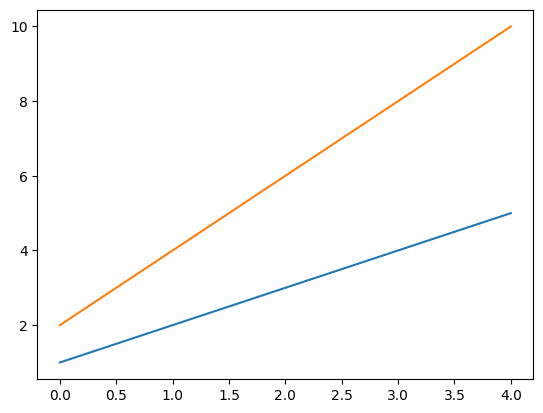

In [19]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt

# 创建一个简单的数据集
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5],
    'y': [2, 4, 6, 8, 10]
})

# 创建一个散点图
chart = alt.Chart(data).mark_circle().encode(
    x='x:Q',
    y='y:Q'
)
# 显示图表
# chart.show()
plt.plot(data)
plt.show()

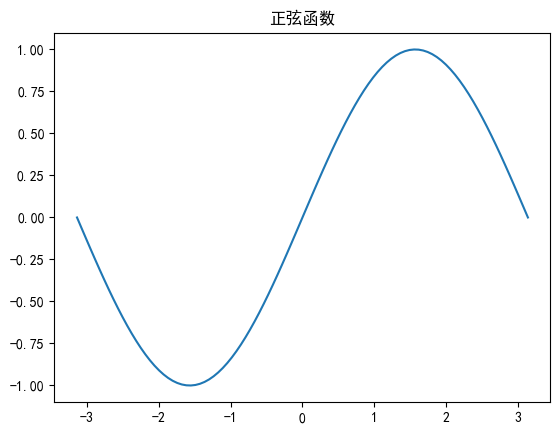

In [23]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.sans-serif"] = ["SimHei"] 
mpl.rcParams['axes.unicode_minus'] = False # 正常显示负号
# zhfont=mpl.font_manager.FontProperties(fname="/System/Library/Fonts/PingFang.ttc")
# mpl.rcParams['axes.unicode_minus'] = False
x=np.linspace(-np.pi,np.pi,100)
y=np.sin(x)
plt.title(u'正弦函数')
plt.plot(x,y)

plt.show()

In [ ]:
# import altair with an abbreviated alias
import altair as alt
# print(alt.Config)

# alt.renderers.set_embed_options(base_url='js/',vega_url='js/vega@5',
# vega_lite_url='js/vega-lite@4',
# vega_embed_url='js/vega-embed@6')
# 算了吧太费劲了，放弃altair
# alt.renderers.enable('html', base_url='js')

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()
# alt.renderers.enable('html', vega_cdn='https://cdnjs.cloudflare.com/libraries/vega', vega_lite_cdn='https://cdnjs.cloudflare.com/libraries/vega-lite')
# https://cdnjs.cloudflare.com/ajax/libs/vega-embed/6.26.0/vega-embed.min.js
# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()